<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-11 17:43:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.1MB/s    in 2.6s    

2025-07-11 17:43:17 (59.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head(30)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



<Figure size 1200x700 with 0 Axes>

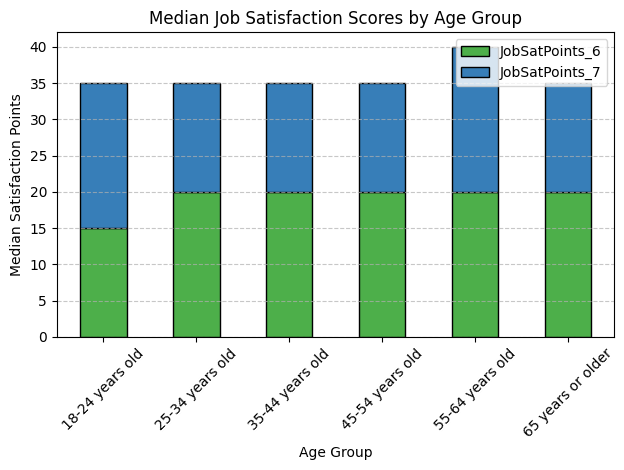

In [7]:
# Step 1: Ensure age is in a consistent format (e.g., '25-34 years old') and clean the data
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7']).copy()

# Step 2: Group by Age and calculate median satisfaction points
median_job_sat = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 3: Sort age groups logically (optional, based on common age buckets)
age_order = [
    'Under 18 years', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older'
]
median_job_sat = median_job_sat.reindex(age_order).dropna()

# Step 4: Plot the stacked bar chart
plt.figure(figsize=(12, 7))
median_job_sat.plot(kind='bar', stacked=True, color=['#4daf4a', '#377eb8'], edgecolor='black')

plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Points')
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


<Figure size 1200x700 with 0 Axes>

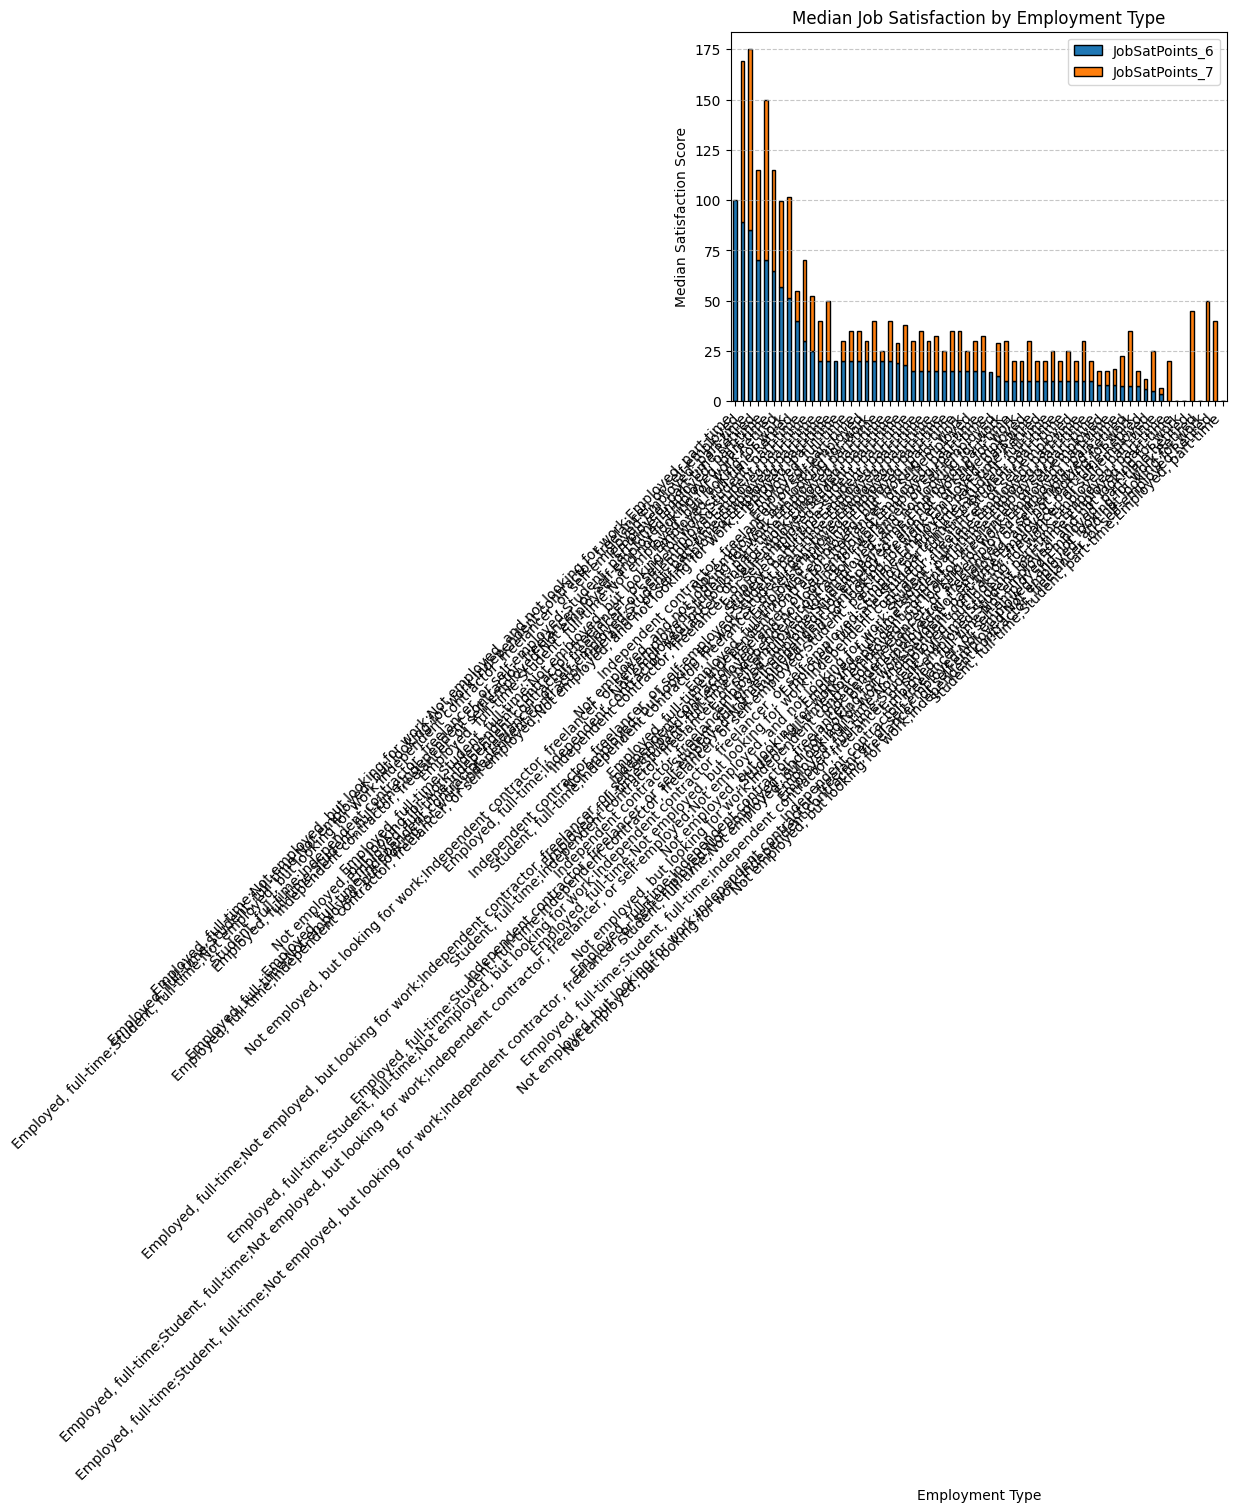

In [9]:
# Step 1: Clean the data — remove rows with missing values
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7']).copy()

# Step 2: Group by Employment type and calculate median satisfaction points
median_satisfaction = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 3: Sort the index alphabetically or based on values (optional)
median_satisfaction = median_satisfaction.sort_values(by='JobSatPoints_6', ascending=False)

# Step 4: Plot the stacked bar chart
plt.figure(figsize=(12, 7))
median_satisfaction.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.title('Median Job Satisfaction by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### Thisstacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [28]:
# Filter for respondents aged 30 to 35 (AgeNum is float)
df_age = df[(df['AgeNum'] >= 30.0) & (df['AgeNum'] <= 35.0)]

# Drop rows with missing values in compensation or job satisfaction
df_age_valid = df_age.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Group by AgeNum and compute median compensation and job satisfaction
median_values = df_age_valid.groupby('AgeNum')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

if median_values.empty:
    print("No data available for ages 30 to 35 with valid compensation and job satisfaction.")
else:
    median_values.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        color=['#4c72b0', '#dd8452'],
        edgecolor='black'
    )
    plt.title('Median Compensation and Job Satisfaction (Age 30–35)')
    plt.xlabel('Age')
    plt.ylabel('Median Values')
    plt.xticks(rotation=0)
    plt.legend(['Median Compensation', 'Median Job Satisfaction'])
    plt.show()

No data available for ages 30 to 35 with valid compensation and job satisfaction.


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


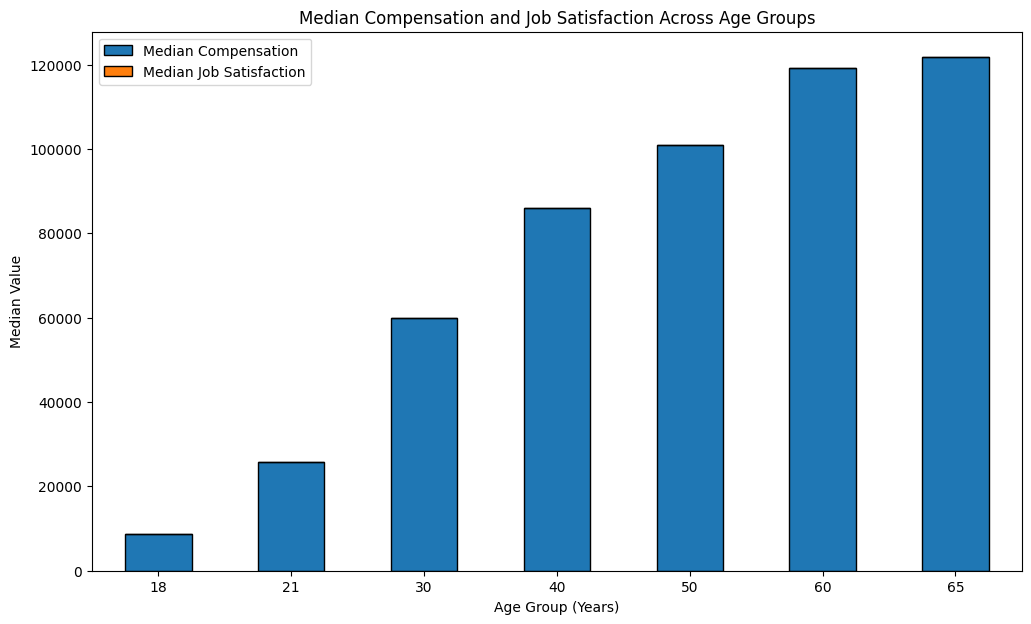

In [31]:
# Example function to convert age range string to average age float
def age_to_num(age_str):
    if pd.isna(age_str):
        return None
    # Extract all numbers in the string (e.g., "25-29 years old" -> [25, 29])
    nums = re.findall(r'\d+', age_str)
    if len(nums) == 2:
        return (float(nums[0]) + float(nums[1])) / 2
    elif len(nums) == 1:
        return float(nums[0])
    else:
        return None

# Apply conversion to create a numeric age column
df['AgeNum'] = df['Age'].apply(age_to_num)

# Filter rows with non-null numeric age, compensation, and job satisfaction
df_filtered = df.dropna(subset=['AgeNum', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Group by age (rounded to integer for neat grouping)

df['AgeGroup'] = df['AgeNum'].round().astype('Int64')

# Compute median compensation and job satisfaction per age group
median_stats = df_filtered.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Plot stacked bar chart
median_stats.plot(
    kind='bar', stacked=True, figsize=(12, 7),
    color=['#1f77b4', '#ff7f0e'], edgecolor='black'
)

plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group (Years)')
plt.ylabel('Median Value')
plt.xticks(rotation=0)
plt.legend(['Median Compensation', 'Median Job Satisfaction'])
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


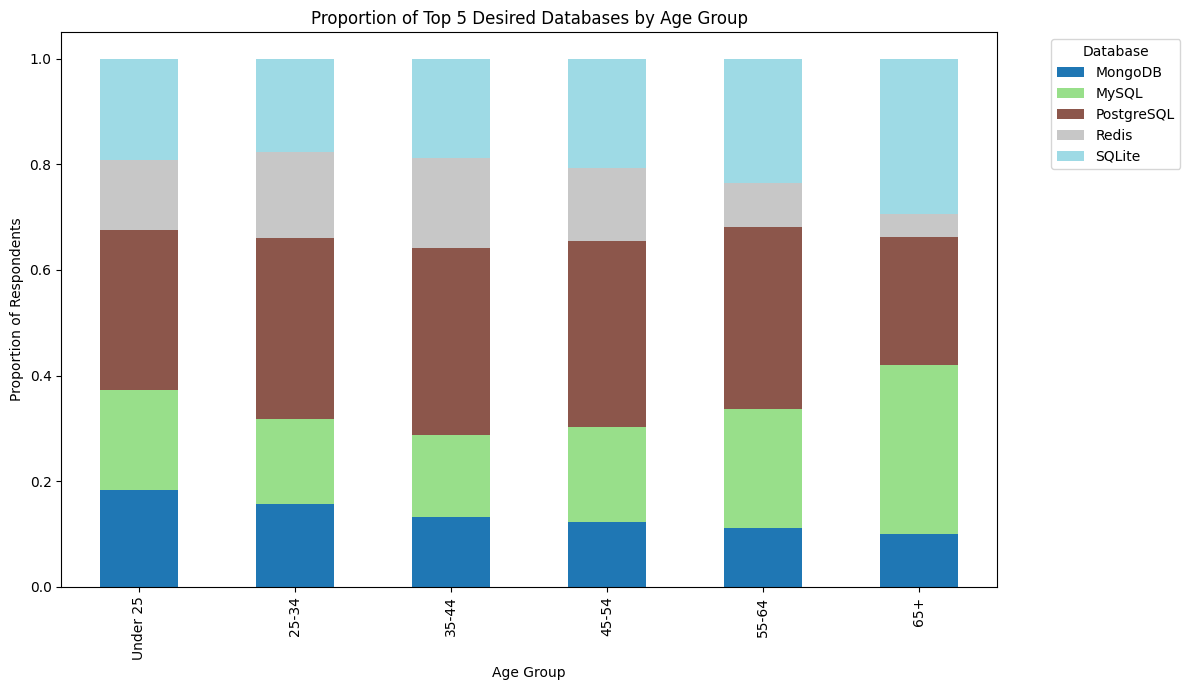

In [33]:

# 1. Convert 'Age' to numeric average of the range, e.g. '30-34 years old' -> 32
def age_to_num(age_str):
    if pd.isna(age_str):
        return None
    if '-' in age_str:
        parts = age_str.split('-')
        try:
            start = int(''.join(filter(str.isdigit, parts[0])))
            end = int(''.join(filter(str.isdigit, parts[1])))
            return (start + end) / 2
        except:
            return None
    else:
        # Handle single values like 'Under 18 years'
        nums = [int(s) for s in age_str.split() if s.isdigit()]
        return nums[0] if nums else None

df['AgeNum'] = df['Age'].apply(age_to_num)

# Define age groups (modify as needed)
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['Under 25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels, right=True)

# 2. Drop rows with missing AgeGroup or DatabaseWantToWorkWith
df_clean = df.dropna(subset=['AgeGroup', 'DatabaseWantToWorkWith']).copy()

# 3. Split database strings into lists
df_clean['DatabaseList'] = df_clean['DatabaseWantToWorkWith'].str.split(';')

# 4. Explode to get one database per row
df_exploded = df_clean.explode('DatabaseList')

# 5. Find top 5 databases overall
top5_databases = df_exploded['DatabaseList'].value_counts().nlargest(5).index.tolist()

# Filter to top 5 only
df_top5 = df_exploded[df_exploded['DatabaseList'].isin(top5_databases)]

# 6. Group by AgeGroup and DatabaseList, count respondents
grouped = df_top5.groupby(['AgeGroup', 'DatabaseList'] , observed=False).size().unstack(fill_value=0)

# 7. Calculate proportions per age group
grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)

# 8. Plot stacked bar chart of proportions
grouped_prop.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Proportion of Top 5 Desired Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


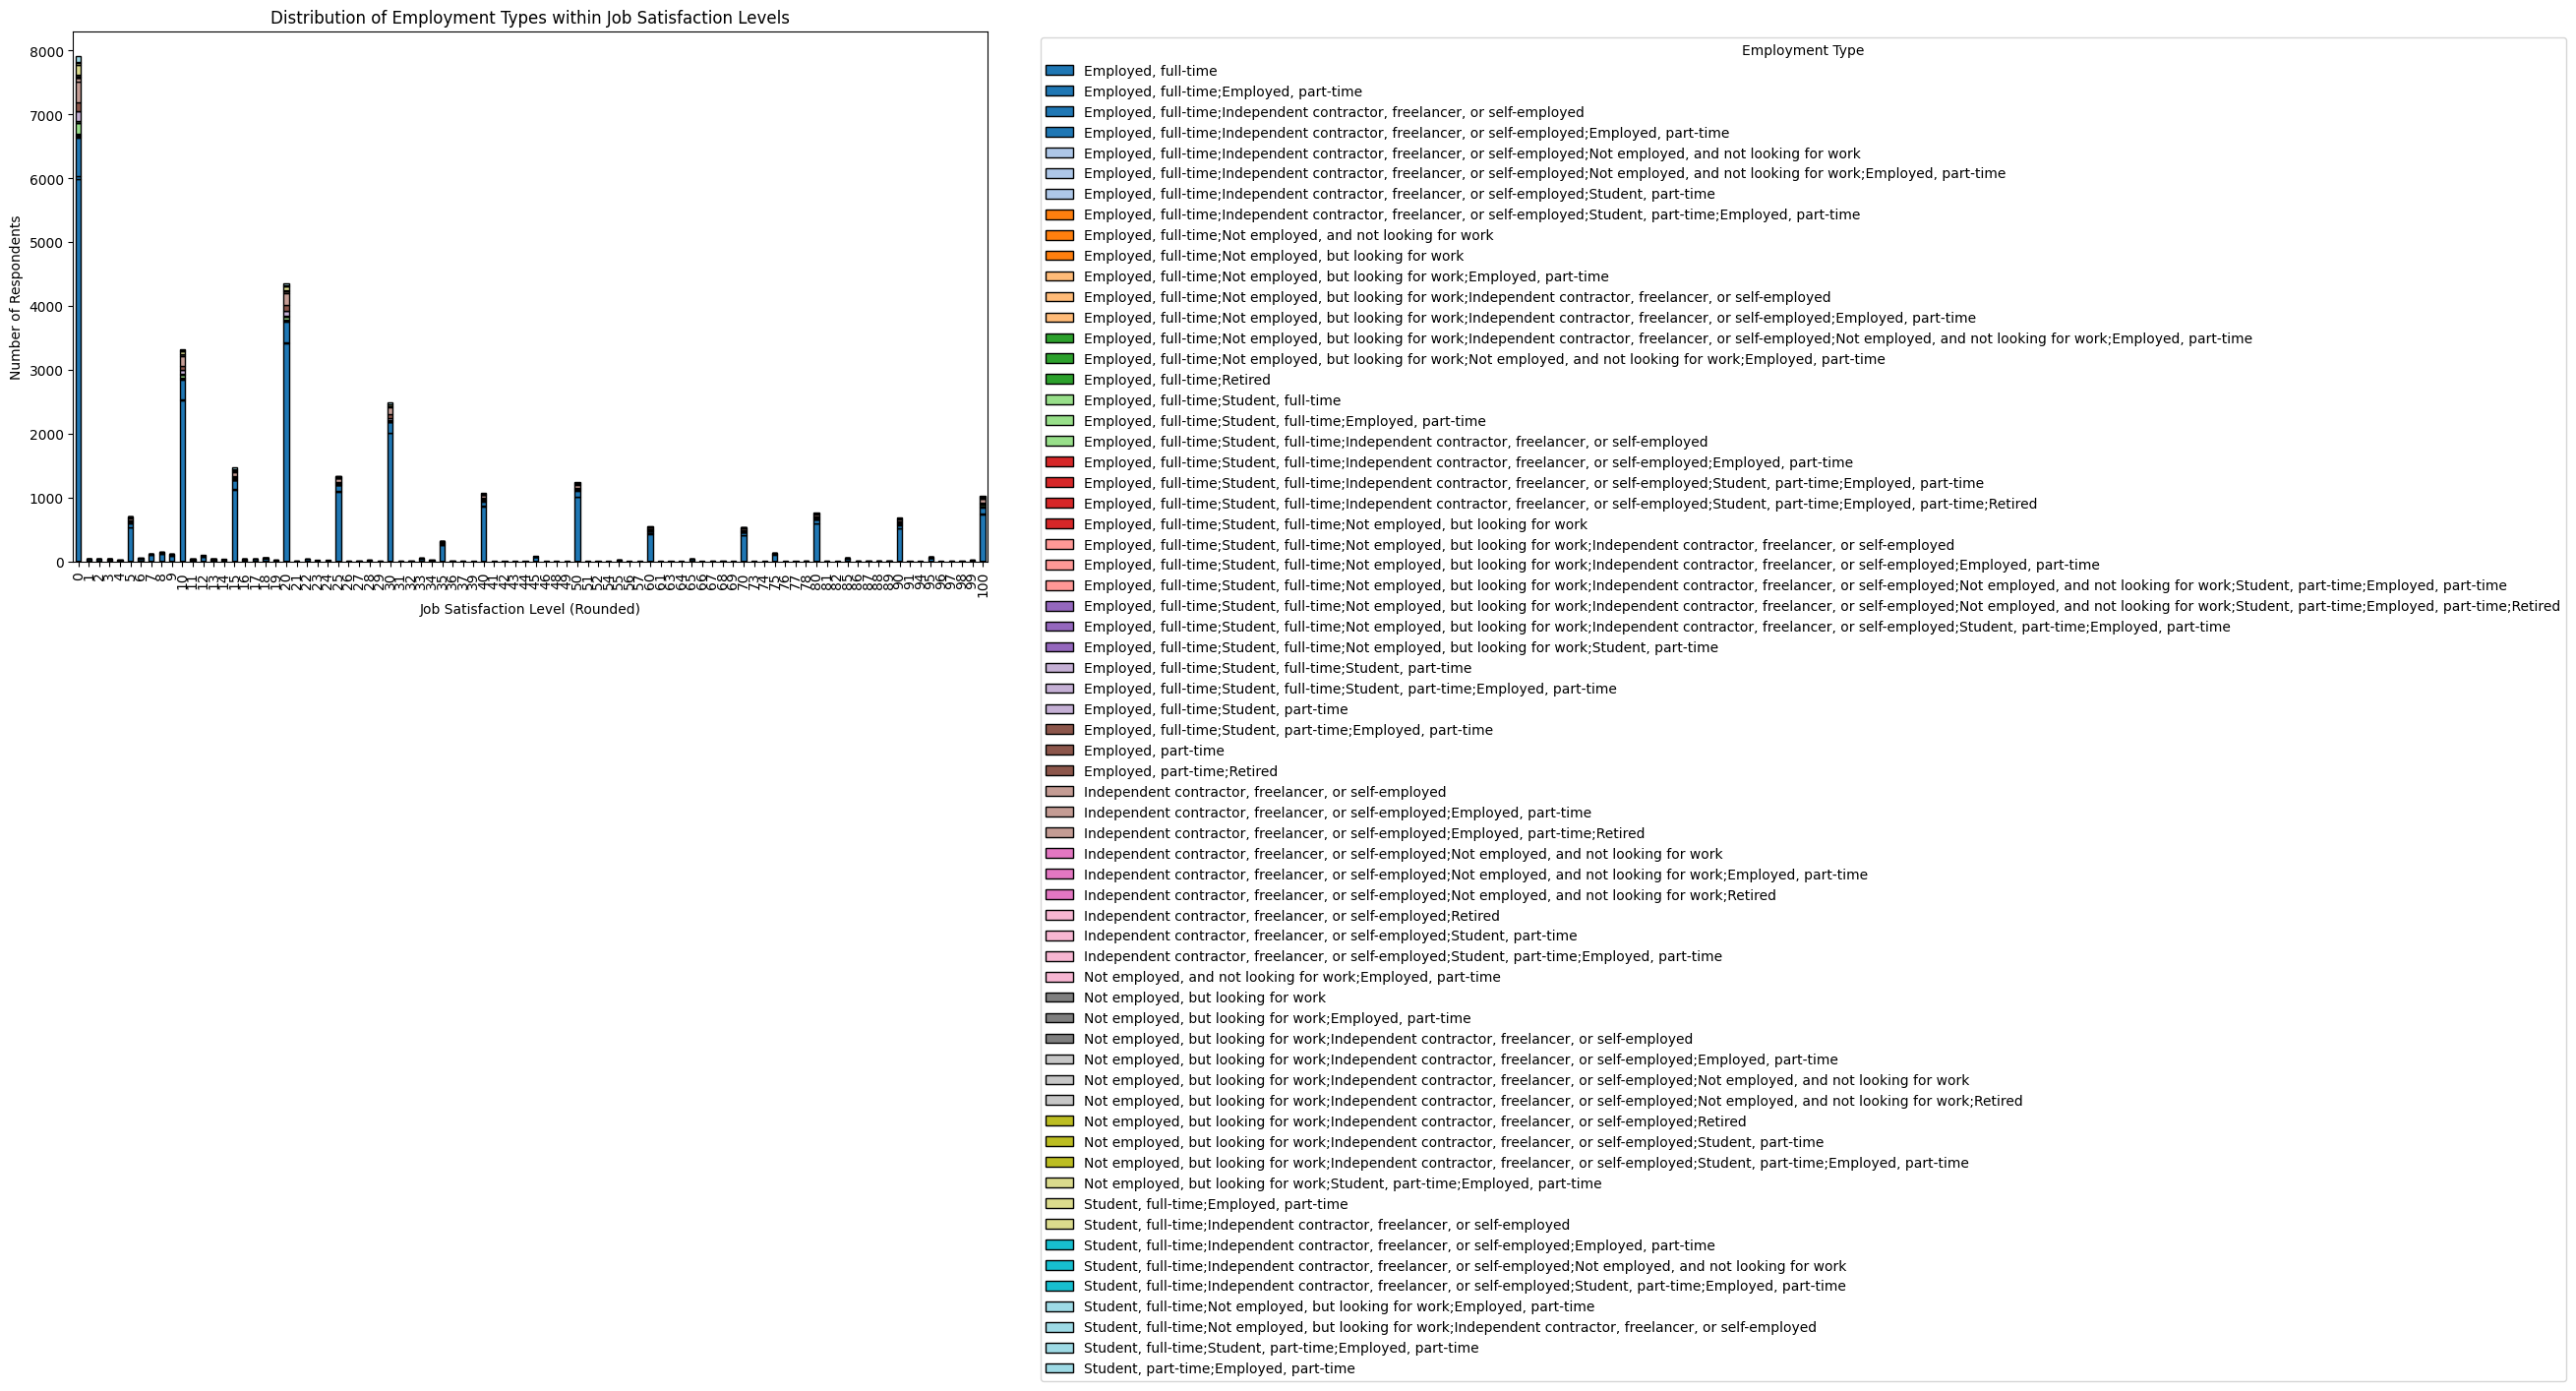

In [35]:
# 1. Filter out nulls
df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6']).copy()

# Optionally, round/simplify job satisfaction to integers or categories
df_filtered['JobSatLevel'] = df_filtered['JobSatPoints_6'].round().astype(int)

# 2 & 3. Group by job satisfaction and employment, count
grouped = df_filtered.groupby(['JobSatLevel', 'Employment']).size().unstack(fill_value=0)

# 4. Sort job satisfaction levels if needed
grouped = grouped.sort_index()

# 5. Plot stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 7), edgecolor='black', colormap='tab20')

plt.title('Distribution of Employment Types within Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level (Rounded)')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


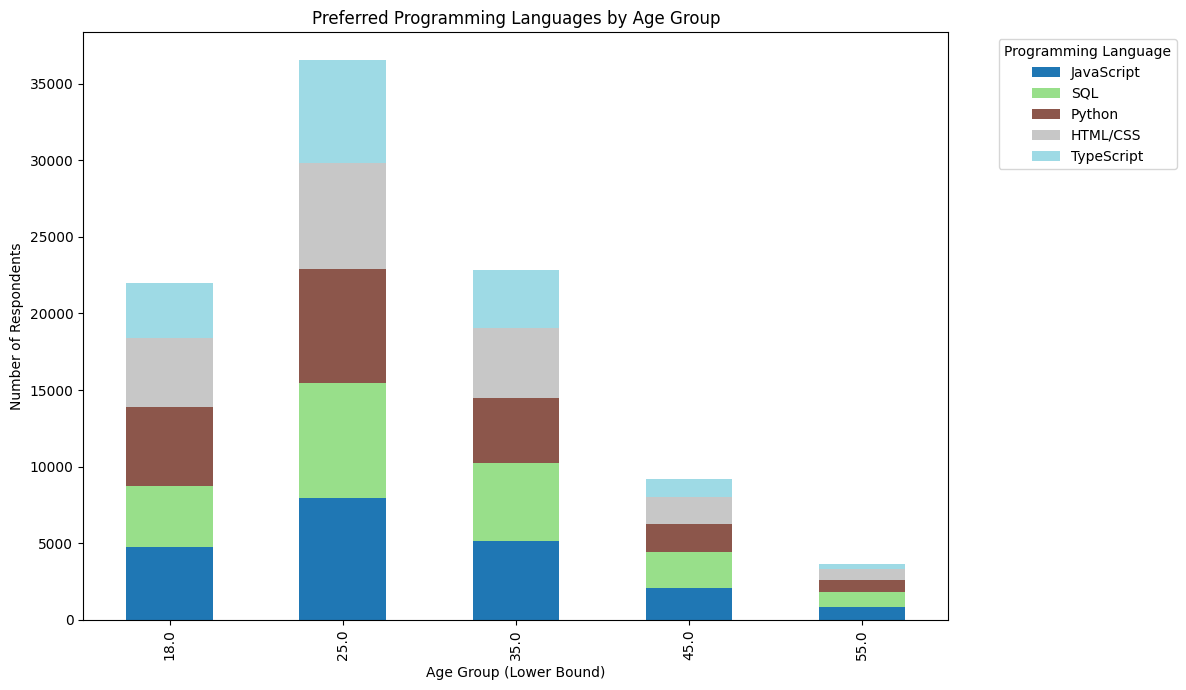

In [36]:
# 1. Filter and clean
df_clean = df.dropna(subset=['Age', 'LanguageAdmired']).copy()

# Extract numeric age group - here we take the lower bound of the age range string like "25-29 years old"
def extract_age_group(age_str):
    try:
        return int(age_str.split('-')[0])
    except:
        return None

df_clean['AgeGroup'] = df_clean['Age'].apply(extract_age_group)
df_clean = df_clean.dropna(subset=['AgeGroup'])

# 2. Split LanguageAdmired into list
df_clean['LanguageList'] = df_clean['LanguageAdmired'].str.split(';')

# 3. Explode so each language is in its own row
df_exploded = df_clean.explode('LanguageList')

# Strip whitespace in language names
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

# 4. Group by AgeGroup and Language, count occurrences
grouped = df_exploded.groupby(['AgeGroup', 'LanguageList']).size().unstack(fill_value=0)

# 5. Select top 5 languages overall
top_languages = grouped.sum(axis=0).sort_values(ascending=False).head(5).index
grouped_top = grouped[top_languages]

# 6. Plot stacked bar chart
ax = grouped_top.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group (Lower Bound)')
plt.ylabel('Number of Respondents')
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


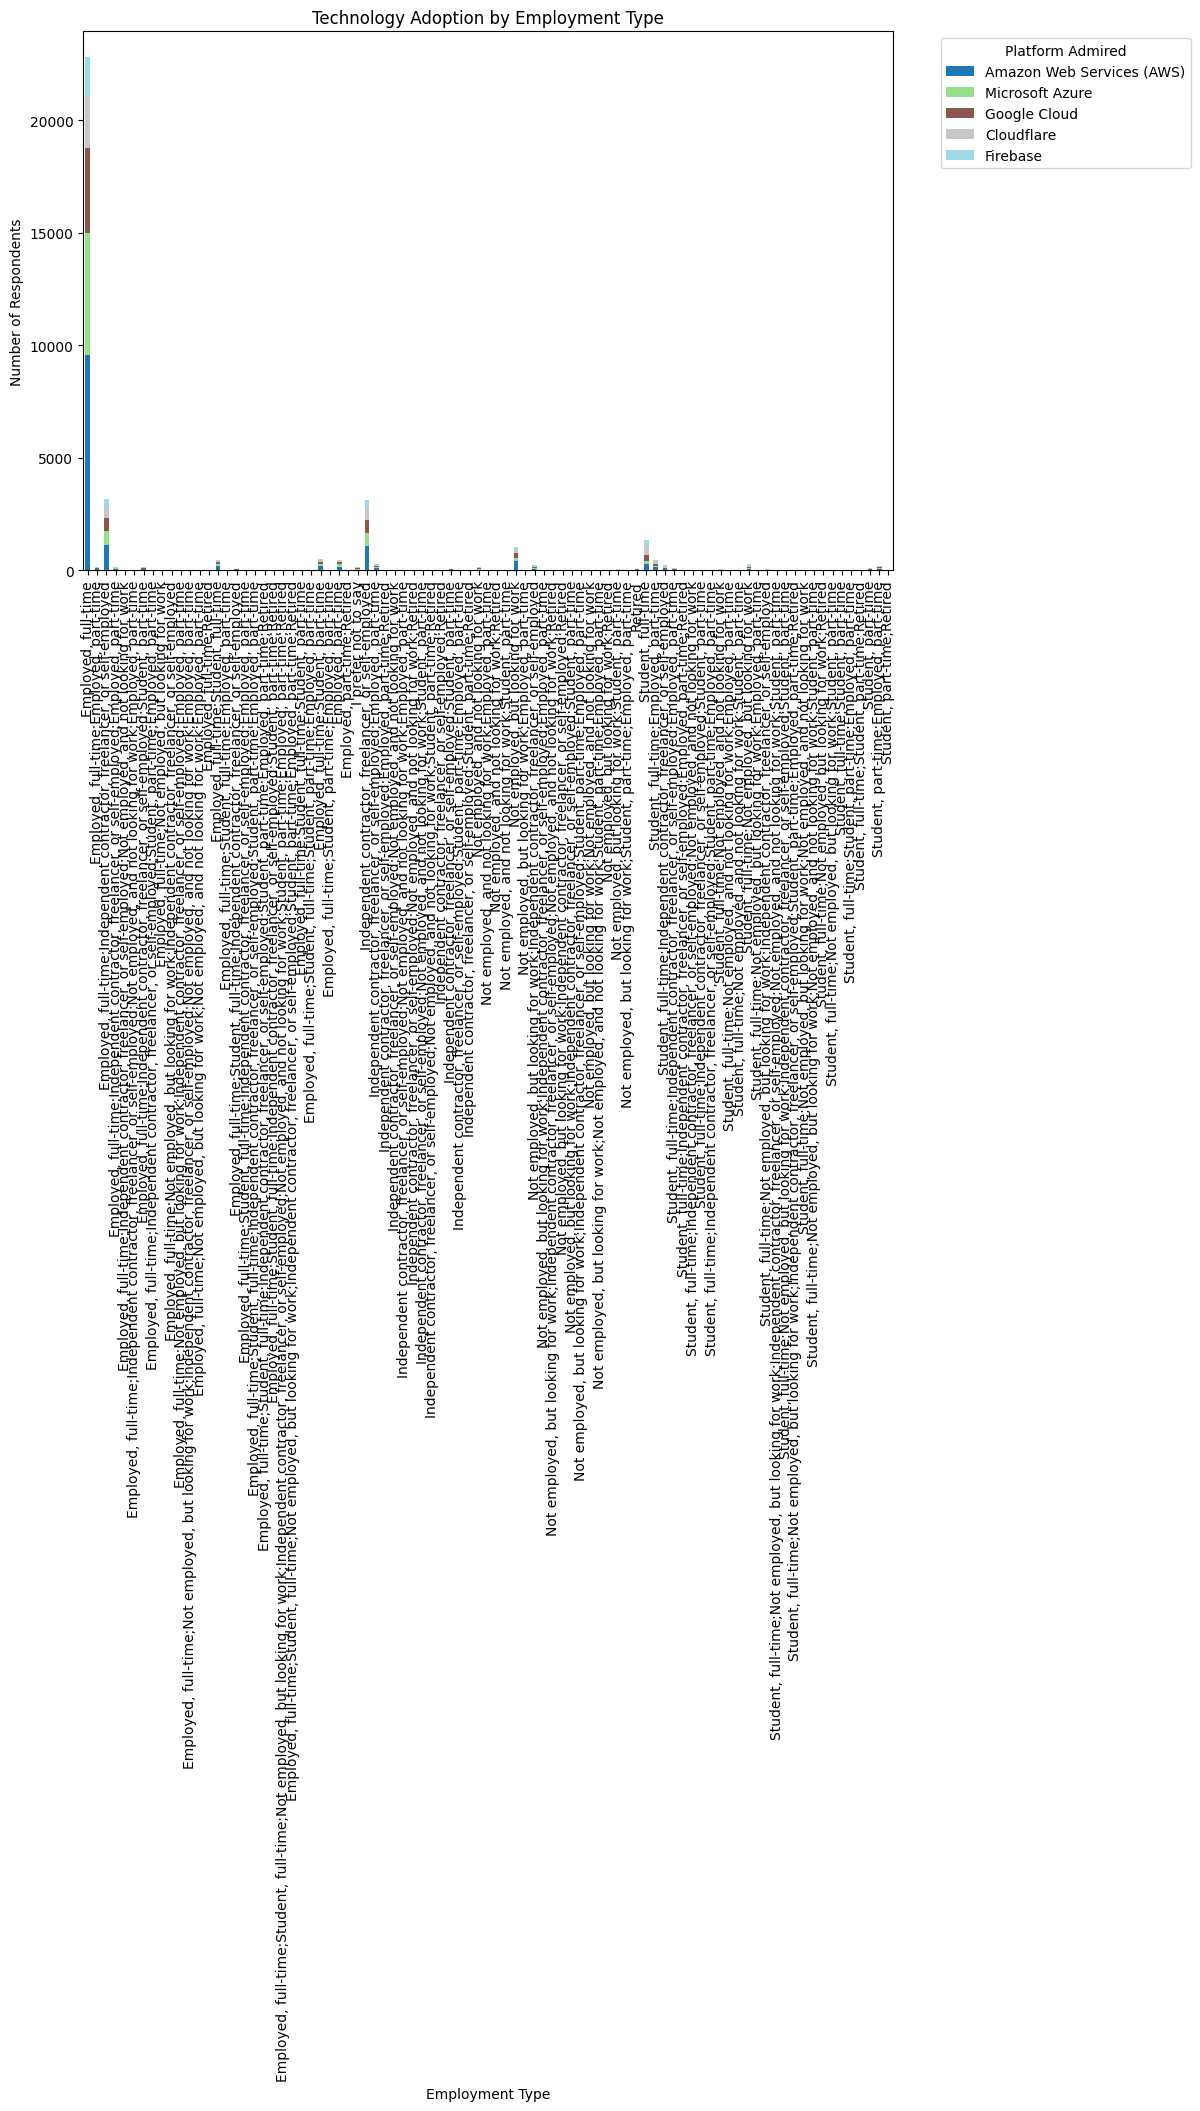

In [40]:
# 1. Filter and clean
df_clean = df.dropna(subset=['Employment', 'PlatformAdmired']).copy()

# 2. Split platforms into list
df_clean['PlatformList'] = df_clean['PlatformAdmired'].str.split(';')

# 3. Explode so each platform is a separate row
df_exploded = df_clean.explode('PlatformList')

# Strip whitespace
df_exploded['PlatformList'] = df_exploded['PlatformList'].str.strip()

# 4. Group by Employment and Platform, count
grouped = df_exploded.groupby(['Employment', 'PlatformList']).size().unstack(fill_value=0)

# 5. Select top 5 platforms overall
top_platforms = grouped.sum(axis=0).sort_values(ascending=False).head(5).index
grouped_top = grouped[top_platforms]

# 6. Plot stacked bar chart
plt.figure(figsize=(12, 7))
grouped_top.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Technology Adoption by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.legend(title='Platform Admired', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(right=0.8)  # leave space on right for legend
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
